# POSTEST5

### Nama : Daviana Dwitasari
### NIM : 2109106064

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## A. Supervised Learning

### Regression

In [3]:
#Pilih fitur dan label
X = df[['avg_glucose_level','age']]

In [4]:
#Gunakan 'stroke' sebagai label
y = df['stroke'] 

In [5]:
#Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Membangun model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
#Melakukan prediksi
y_pred = model.predict(X_test)

In [8]:
#Menghitung MAE, MSE, RMSE, dan R2-Score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)

In [9]:
#Tampilkan Hasil
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 0.10417526786964872
MSE: 0.052635011714918675
RMSE: 0.22942321529199847
R2-Score: 0.07633690228418788


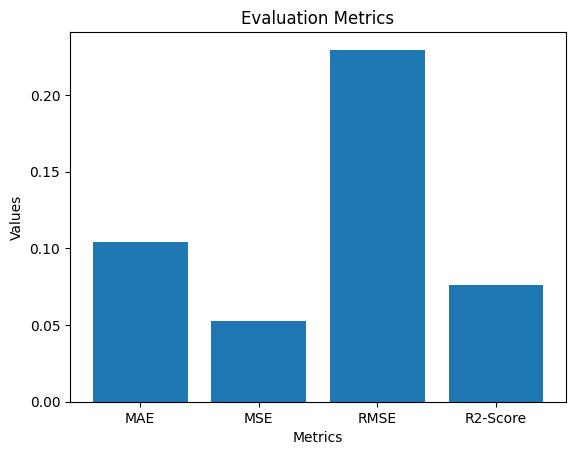

In [10]:
# Data metrik
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]

# Plot bar untuk menampilkan metrik
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

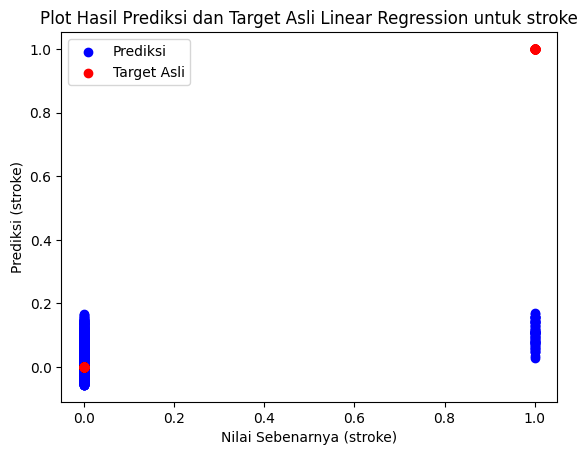

In [13]:
#Plot Hasil Prediksi dan Target Asli
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (stroke)")
plt.ylabel("Prediksi (stroke)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk stroke")
plt.legend()
plt.show()

# B. Unsupervised Learning

### B1. Implementasi K-Means

In [14]:
#Menggunakan kolom age (kolom ke-0) dan educational-num (kolom ke-4)
X = df.iloc[:, [0, 4]].values 

In [15]:
#Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
wcss = []  

In [16]:
#Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

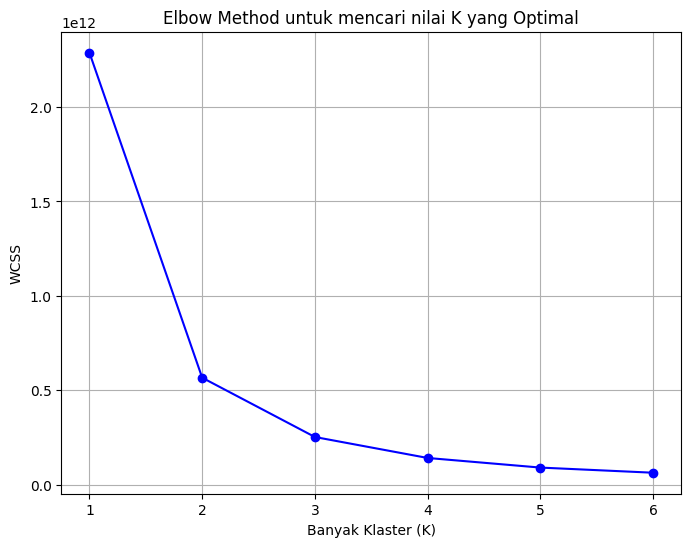

In [17]:
#Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [18]:
#Inisialisasi model K-Means dengan nilai K yang sesuai
k = 3 
kmeans = KMeans(k, n_init=10)

In [19]:
#Pilih hanya kolom "age" dan "avg_glucose_level" sebagai fitur X.
X = df[["age", "avg_glucose_level"]]

In [20]:
#Fit model K-Means pada dataset
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [21]:
#Prediksi cluster untuk setiap data point dalam dataset
predicted_clusters = kmeans.predict(X)
#Tambahkan kolom "cluster" ke dataset
df["cluster"] = predicted_clusters

### B2 Evaluasi Cluster yang telah diprediksi

a. Unlabeled Dataset (Dataset Tanpa Label)

X adalah dataset yang telah di-cluster dengan K-Means

predicted_clusters adalah hasil clustering yang telah diprediksi

In [22]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.40
Davies-Bouldin Index: 0.88
Calinski-Harabasz Index: 7901.03


b. Labeled Dataset (Dataset Dengan Label)

true_labels adalah kolom yang berisi label asli dataset

In [23]:
true_labels = df['stroke']

In [24]:
#Menggantilah dengan nama dataset yang sesuai dan predicted_clusters yang sesuai
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
stroke     0    1
row_0            
0       2136  151
1        639   90
2       2086    8 



Adjusted Rand Index (ARI)

In [25]:
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.02


Normalized Mutual Information (NMI)

In [30]:
nmi_age = normalized_mutual_info_score(df['age'], predicted_clusters)
nmi_avg_glucose_level = normalized_mutual_info_score(df['avg_glucose_level'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) for age: {nmi_hypertension:.2f}")
print(f"Normalized Mutual Information (NMI) for avg_glucose_level: {nmi_age:.2f}")

Normalized Mutual Information (NMI) for age: 0.06
Normalized Mutual Information (NMI) for avg_glucose_level: 0.22


C:\Users\USER\venv_B1-21\Daviana_064\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\USER\venv_B1-21\Daviana_064\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [31]:
#Fungsi HCV-M
homogeneity = homogeneity_score(true_labels, predicted_clusters)
completeness = completeness_score(true_labels, predicted_clusters)
v_measure = v_measure_score(true_labels, predicted_clusters)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.11
Completeness Score: 0.02
V-Measure Score: 0.04


### B2. Menampilkan hasil prediksi clustering dengan target asli

In [33]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=df, x="age", y="avg_glucose_level", palette=colors,
                hue="cluster_mapped", marker="D", s=130, label="Predicted Clusters")

# Scatter plot target asli
sns.scatterplot(data=df, x="age", y="avg_glucose_level", palette=colors,
                hue="stroke", marker="o", s=40, label="True Labels")

# Tambahkan titik pusat cluster
cluster_centers = df.groupby("cluster_mapped").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["age"], y=cluster_centers["avg_glucose_level"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="Cluster Centers")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("Age")
plt.ylabel("avg_glucose_level")
plt.legend(title="Legend", loc="upper right")
plt.show()

ValueError: Could not interpret value `cluster_mapped` for parameter `hue`

<Figure size 900x1300 with 0 Axes>